# SETUP: Setting up colab with drive folders

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)


Mounted at /gdrive


You must add a 498 folder to your drive and put the neural lns project folder in that folder for these paths to work correctly. 

In [ ]:
%cd /gdrive/MyDrive/498/neural_lns/

/gdrive/MyDrive/498/neural_lns


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# install all project requirements
!pip install -r requirements.txt 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# DATA GENERATION: LP Instance creation



 example of how to generate instances for case cauctions (takes a while)

In [ ]:
import os 
# check that the instances exist
cases = ['facilities', 'schedules', 'cauctions']
flag = True
for case in cases: 
  if not os.path.exists('data/instances/' + case):
    flag = False
    print("Case {} does not currently exist".format(case))
    print("Generating..")
    # generate the instances if they don't exist
    %python3 generate_instances.py case 

if flag:
  print("All Cases already exist")
else:
  print("All Cases have been created")
  

All Cases already exist


#  DATA GENERATION: Solving Instances to Create Training Data

In [ ]:
from data_generation import main

flag = True
cases = ['facilities', 'schedules', 'cauctions'] 

# check that the solved instances exists
for case in cases: 
  if not os.path.exists('data/samples/' + case):
    flag = False
    print("Case {} does not exist".format(case))
    # generate the samples if they do not exist (takes a while)
    main(case)

if flag:
  print("All Cases already exist")
else:
  print("All Cases have been created")

All Cases already exist


# TRAINING

In [ ]:
%cd ..

/gdrive/MyDrive/498


In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


## Run training on different datasets
To change which dataset to run it on, edit the path in config_train file

### Facilities Problem

In [ ]:
!python3 neural_lns/train.py

2022-11-27 20:06:25.198753: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I1127 20:06:25.202801 140657278809984 train.py:250] Found GPUs: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 20:06:25.230713 140657278809984 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 20:06:25.231158 140657278809984 train.py:255] Distribution strategy: <sonnet.src.distribute.replicator.Replicator object at 0x7feccb681890>
I1127 20:06:25.231468 140657278809984 train.py:256] Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/struc

### Cauctions problem

In [ ]:
!python3 neural_lns/train.py

2022-11-27 20:41:21.110662: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I1127 20:41:21.111697 139820255799168 train.py:250] Found GPUs: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 20:41:21.117599 139820255799168 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 20:41:21.118059 139820255799168 train.py:255] Distribution strategy: <sonnet.src.distribute.replicator.Replicator object at 0x7f29e964fd90>
I1127 20:41:21.118365 139820255799168 train.py:256] Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/struc

### Scheduling Problem

In [ ]:
!python3 neural_lns/train.py

2022-11-27 21:08:08.258986: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I1127 21:08:08.260185 140372597385088 train.py:250] Found GPUs: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 21:08:08.266355 140372597385088 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 21:08:08.266812 140372597385088 train.py:255] Distribution strategy: <sonnet.src.distribute.replicator.Replicator object at 0x7faa83083c10>
I1127 21:08:08.267119 140372597385088 train.py:256] Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/struc

# Loss Graphs

## Facilities Loss

In [ ]:
loss = '''2022-11-27 20:06:25.198753: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I1127 20:06:25.202801 140657278809984 train.py:250] Found GPUs: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 20:06:25.230713 140657278809984 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 20:06:25.231158 140657278809984 train.py:255] Distribution strategy: <sonnet.src.distribute.replicator.Replicator object at 0x7feccb681890>
I1127 20:06:25.231468 140657278809984 train.py:256] Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:09:46.839104 140657278809984 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:09:46.840565 140657278809984 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:09:46.843805 140657278809984 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:09:46.844618 140657278809984 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:09:46.851724 140657278809984 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:09:46.852612 140657278809984 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:09:46.854392 140657278809984 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:09:46.855143 140657278809984 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:09:46.862936 140657278809984 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:09:46.863858 140657278809984 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:09:46.883904 140657278809984 train.py:207] Initializing from scratch.
I1127 20:28:01.274571 140657278809984 train.py:210] Starting training...
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 20:28:06.082906 140657278809984 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 20:28:06.084197 140651634247424 train.py:93] retracing step_fn
Local loss [[0.524225712]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 20:28:16.247141 140657278809984 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 20:28:16.248331 140649437026048 train.py:93] retracing step_fn
Local loss [[0.244767234]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 20:28:20.926626 140657278809984 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 20:28:20.927762 140646995875584 train.py:93] retracing step_fn
Local loss [[0.234866977]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 20:28:25.621208 140657278809984 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 20:28:25.622877 140644422227712 train.py:93] retracing step_fn
Local loss [[0.190715134]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 20:28:30.250697 140657278809984 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 20:28:30.252310 140642129630976 train.py:93] retracing step_fn
Local loss [[0.0904601961]]
I1127 20:28:34.952421 140639274997504 train.py:93] retracing step_fn
Local loss [[0.258758813]]
I1127 20:28:39.471744 140636984850176 train.py:93] retracing step_fn
Local loss [[0.0695725232]]
I1127 20:28:43.860294 140634689271552 train.py:93] retracing step_fn
Local loss [[0.167383954]]
I1127 20:28:48.349727 140632387581696 train.py:93] retracing step_fn
Local loss [[0.193985671]]
I1127 20:28:52.791775 140630094444288 train.py:93] retracing step_fn
Local loss [[0.16528672]]
I1127 20:28:53.112718 140657278809984 train.py:224] [10] loss = 0.2140, acc = 0.9310 auc = 0.9058 steps_per_second = 0.19365616209089104
tcmalloc: large alloc 1073741824 bytes == 0x7fe6360f4000 @  0x7fed52de4b6b 0x7fed52e04379 0x7fed137232ec 0x7fed06e02540 0x7fed06e00839 0x7fed06e017ca 0x7fed06e01ca9 0x7fed06e02181 0x7fed05c03fe3 0x7fed003c6fec 0x7fed00232796 0x7fed00158c4a 0x7fed0909b904 0x7fed003c864b 0x7fed0036f761 0x7fed0e491701 0x7fed0e0b4dd5 0x7fed0e0b2b03 0x7fed00ab633b 0x7fed527c66db 0x7fed52aff61f
I1127 20:28:57.489039 140626690340608 train.py:93] retracing step_fn
Local loss [[0.219325736]]
I1127 20:29:01.892387 140624389347072 train.py:93] retracing step_fn
Local loss [[0.0887680054]]
I1127 20:29:06.469436 140622095521536 train.py:93] retracing step_fn
Local loss [[0.141916588]]
I1127 20:29:11.039136 140619805038336 train.py:93] retracing step_fn
Local loss [[0.171016917]]
I1127 20:29:15.577085 140617511393024 train.py:93] retracing step_fn
Local loss [[0.158131316]]
I1127 20:29:20.088448 140615210063616 train.py:93] retracing step_fn
Local loss [[0.0981173068]]
I1127 20:29:24.563376 140612916238080 train.py:93] retracing step_fn
Local loss [[0.113318816]]
I1127 20:29:28.956016 140610624354048 train.py:93] retracing step_fn
Local loss [[0.163093016]]
I1127 20:29:29.080925 140610624354048 train.py:93] retracing step_fn
Local loss [[0.209046319]]
I1127 20:29:33.570208 140608322139904 train.py:93] retracing step_fn
Local loss [[0.189429954]]
I1127 20:29:33.704932 140657278809984 train.py:224] [20] loss = 0.1552, acc = 0.9490 auc = 0.9187 steps_per_second = 0.24646915449203588
I1127 20:29:38.082459 140606030255872 train.py:93] retracing step_fn
Local loss [[0.183249742]]
I1127 20:29:42.565027 140603737495296 train.py:93] retracing step_fn
tcmalloc: large alloc 2147483648 bytes == 0x7fe05b53c000 @  0x7fed52de4b6b 0x7fed52e04379 0x7fed137232ec 0x7fed06e02540 0x7fed06e00839 0x7fed06e017ca 0x7fed06e01ca9 0x7fed06e02181 0x7fed05c03fe3 0x7fed003c6fec 0x7fed002317dd 0x7fed00057bea 0x7fed0005845f 0x7fed00058632 0x7fed07168914 0x7fed003c864b 0x7fed0036c060 0x7fed00356aae 0x7fed0e491701 0x7fed0e0b4dd5 0x7fed0e0b2b03 0x7fed00ab633b 0x7fed527c66db 0x7fed52aff61f
Local loss [[0.21310389]]
I1127 20:29:47.165048 140599221745408 train.py:93] retracing step_fn
Local loss [[0.17179215]]
I1127 20:29:51.639675 140596927919872 train.py:93] retracing step_fn
Local loss [[0.151844323]]
I1127 20:29:56.226001 140594633930496 train.py:93] retracing step_fn
Local loss [[0.165928766]]
I1127 20:30:00.640215 140592333657856 train.py:93] retracing step_fn
Local loss [[0.135451734]]
I1127 20:30:05.006662 140590041773824 train.py:93] retracing step_fn
Local loss [[0.16892603]]
I1127 20:30:09.405806 140587749889792 train.py:93] retracing step_fn
Local loss [[0.0881343856]]
I1127 20:30:13.934403 140585449617152 train.py:93] retracing step_fn
Local loss [[0.178940088]]
I1127 20:30:18.545279 140583157733120 train.py:93] retracing step_fn
Local loss [[0.163988471]]
I1127 20:30:18.684370 140657278809984 train.py:224] [30] loss = 0.1621, acc = 0.9470 auc = 0.9173 steps_per_second = 0.22242361572462213
I1127 20:30:18.768546 140657278809984 train.py:241] Saved checkpoint: /gdrive/MyDrive/498/neural_lns/models/ckpt-1'''

[Text(0.5, 0, 'Steps')]

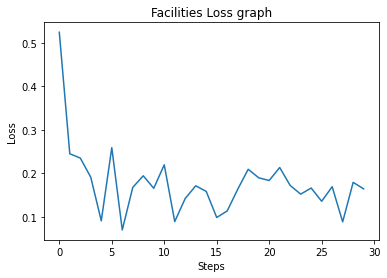

In [ ]:

loss = loss.replace('[[', '|')
loss = loss.replace(']]', '|')
loss_list = loss.split('|')

losses = []
for el in loss_list:
  try:
    x = float(el)
    losses.append(x)
  except ValueError:
     continue

loss_df = pd.DataFrame(losses, columns=['Loss'])
g = sns.lineplot(data=loss_df, x=loss_df.index, y='Loss')
g.set(title='Facilities Loss graph')
g.set(xlabel='Steps')



## Cauctions Loss

In [ ]:
loss = '''2022-11-27 20:41:21.110662: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I1127 20:41:21.111697 139820255799168 train.py:250] Found GPUs: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 20:41:21.117599 139820255799168 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 20:41:21.118059 139820255799168 train.py:255] Distribution strategy: <sonnet.src.distribute.replicator.Replicator object at 0x7f29e964fd90>
I1127 20:41:21.118365 139820255799168 train.py:256] Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:44:42.190393 139820255799168 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:44:42.191716 139820255799168 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:44:42.194441 139820255799168 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:44:42.195196 139820255799168 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:44:42.201020 139820255799168 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:44:42.201782 139820255799168 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:44:42.203353 139820255799168 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:44:42.204101 139820255799168 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:44:42.210548 139820255799168 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:44:42.211312 139820255799168 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 20:44:42.228776 139820255799168 train.py:207] Initializing from scratch.
I1127 21:03:17.218518 139820255799168 train.py:210] Starting training...
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 21:03:18.582434 139820255799168 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 21:03:18.583924 139814611334912 train.py:93] retracing step_fn
Local loss [[1.11271322]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 21:03:20.998072 139820255799168 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 21:03:20.999424 139814592714496 train.py:93] retracing step_fn
Local loss [[0.381616026]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 21:03:22.500724 139820255799168 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 21:03:22.502048 139814271710976 train.py:93] retracing step_fn
Local loss [[0.29080838]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 21:03:23.930646 139820255799168 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 21:03:23.931966 139814254925568 train.py:93] retracing step_fn
Local loss [[0.249430269]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 21:03:25.431968 139820255799168 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 21:03:25.433145 139814238140160 train.py:93] retracing step_fn
Local loss [[0.273755252]]
I1127 21:03:26.938158 139814221354752 train.py:93] retracing step_fn
Local loss [[0.208580941]]
I1127 21:03:28.388446 139814204569344 train.py:93] retracing step_fn
Local loss [[0.238259554]]
I1127 21:03:29.849584 139814187783936 train.py:93] retracing step_fn
Local loss [[0.213820755]]
I1127 21:03:31.469026 139814170998528 train.py:93] retracing step_fn
Local loss [[0.196927667]]
I1127 21:03:33.006980 139814154213120 train.py:93] retracing step_fn
Local loss [[0.178175479]]
I1127 21:03:33.122454 139820255799168 train.py:224] [10] loss = 0.3344, acc = 0.8410 auc = 0.6530 steps_per_second = 0.6297118646022897
I1127 21:03:34.526523 139814137427712 train.py:93] retracing step_fn
Local loss [[0.225601092]]
I1127 21:03:35.953697 139814120642304 train.py:93] retracing step_fn
Local loss [[0.20473963]]
I1127 21:03:37.407586 139814103856896 train.py:93] retracing step_fn
Local loss [[0.181995898]]
I1127 21:03:38.832756 139814087071488 train.py:93] retracing step_fn
Local loss [[0.165250912]]
I1127 21:03:40.302818 139814070286080 train.py:93] retracing step_fn
Local loss [[0.179726735]]
I1127 21:03:41.778017 139814053500672 train.py:93] retracing step_fn
Local loss [[0.160329849]]
I1127 21:03:43.278585 139814036715264 train.py:93] retracing step_fn
Local loss [[0.199025989]]
I1127 21:03:44.786458 139814019929856 train.py:93] retracing step_fn
Local loss [[0.152017266]]
I1127 21:03:46.271295 139814003144448 train.py:93] retracing step_fn
Local loss [[0.133707717]]
I1127 21:03:47.760214 139813986359040 train.py:93] retracing step_fn
Local loss [[0.167986155]]
I1127 21:03:47.874104 139820255799168 train.py:224] [20] loss = 0.1770, acc = 0.9314 auc = 0.8936 steps_per_second = 0.6787776691687295
I1127 21:03:49.361714 139813969573632 train.py:93] retracing step_fn
Local loss [[0.164256766]]
I1127 21:03:50.900232 139813952788224 train.py:93] retracing step_fn
Local loss [[0.167641878]]
I1127 21:03:52.440918 139813936002816 train.py:93] retracing step_fn
Local loss [[0.152324975]]
I1127 21:03:53.985582 139813865740032 train.py:93] retracing step_fn
Local loss [[0.148343325]]
I1127 21:03:55.574432 139813715777280 train.py:93] retracing step_fn
Local loss [[0.196507365]]
I1127 21:03:57.205982 139813567919872 train.py:93] retracing step_fn
Local loss [[0.137382567]]
I1127 21:03:58.806797 139813420062464 train.py:93] retracing step_fn
Local loss [[0.136637226]]
I1127 21:04:00.327338 139813133784832 train.py:93] retracing step_fn
Local loss [[0.137836128]]
I1127 21:04:01.838888 139812985927424 train.py:93] retracing step_fn
Local loss [[0.161818758]]
I1127 21:04:03.347582 139812838070016 train.py:93] retracing step_fn
Local loss [[0.174931124]]
I1127 21:04:03.463319 139820255799168 train.py:224] [30] loss = 0.1578, acc = 0.9380 auc = 0.9145 steps_per_second = 0.6422320051779333
I1127 21:04:03.516546 139820255799168 train.py:241] Saved checkpoint: /gdrive/MyDrive/498/neural_lns/models/ckpt-1'''

[Text(0.5, 0, 'Steps')]

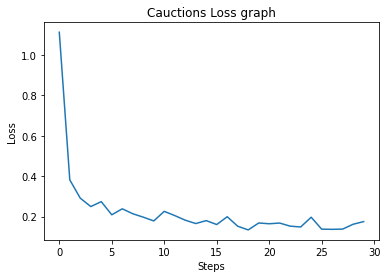

In [ ]:

loss = loss.replace('[[', '|')
loss = loss.replace(']]', '|')
loss_list = loss.split('|')

losses = []
for el in loss_list:
  try:
    x = float(el)
    losses.append(x)
  except ValueError:
     continue

loss_df = pd.DataFrame(losses, columns=['Loss'])
g = sns.lineplot(data=loss_df, x=loss_df.index, y='Loss')
g.set(title='Cauctions Loss graph')
g.set(xlabel='Steps')



## Schedules Loss

In [ ]:
loss = '''
2022-11-27 21:08:08.258986: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I1127 21:08:08.260185 140372597385088 train.py:250] Found GPUs: [LogicalDevice(name='/device:GPU:0', device_type='GPU')]
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 21:08:08.266355 140372597385088 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1127 21:08:08.266812 140372597385088 train.py:255] Distribution strategy: <sonnet.src.distribute.replicator.Replicator object at 0x7faa83083c10>
I1127 21:08:08.267119 140372597385088 train.py:256] Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 21:11:33.764850 140372597385088 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 21:11:33.766439 140372597385088 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 21:11:33.769994 140372597385088 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 21:11:33.770925 140372597385088 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 21:11:33.778700 140372597385088 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 21:11:33.779792 140372597385088 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 21:11:33.781759 140372597385088 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 21:11:33.782600 140372597385088 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 21:11:33.791404 140372597385088 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 21:11:33.792478 140372597385088 cross_device_ops.py:618] Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
I1127 21:11:33.811962 140372597385088 train.py:207] Initializing from scratch.
I1127 21:30:13.343015 140372597385088 train.py:210] Starting training...
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 21:30:16.024165 140372597385088 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 21:30:16.025670 140366952675072 train.py:93] retracing step_fn
Local loss [[0.516127]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 21:30:19.600219 140372597385088 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 21:30:19.601662 140366934054656 train.py:93] retracing step_fn
Local loss [[0.120018438]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 21:30:22.293445 140372597385088 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 21:30:22.294796 140366544107264 train.py:93] retracing step_fn
Local loss [[0.116112575]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 21:30:24.987970 140372597385088 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 21:30:24.989579 140366237914880 train.py:93] retracing step_fn
Local loss [[0.111864045]]
WARNING:tensorflow:Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
W1127 21:30:27.648474 140372597385088 mirrored_run.py:92] Using Replicator eagerly has significant overhead currently. We will be working on improving this in the future, but for now please wrap `call_for_each_replica` or `experimental_run` or `run` inside a tf.function to get the best performance.
I1127 21:30:27.649759 140365035181824 train.py:93] retracing step_fn
Local loss [[0.102098368]]
I1127 21:30:30.266386 140363962472192 train.py:93] retracing step_fn
Local loss [[0.100123823]]
I1127 21:30:32.953487 140362898151168 train.py:93] retracing step_fn
Local loss [[0.0961227119]]
I1127 21:30:35.513806 140361833830144 train.py:93] retracing step_fn
Local loss [[0.0890475586]]
I1127 21:30:38.207678 140360492685056 train.py:93] retracing step_fn
Local loss [[0.0791699663]]
I1127 21:30:40.952946 140359428364032 train.py:93] retracing step_fn
Local loss [[0.067075856]]
I1127 21:30:41.078477 140372597385088 train.py:224] [10] loss = 0.1398, acc = 0.9756 auc = 0.7642 steps_per_second = 0.36084608954697234
I1127 21:30:43.638746 140358364043008 train.py:93] retracing step_fn
Local loss [[0.0531792864]]
I1127 21:30:46.212692 140357299721984 train.py:93] retracing step_fn
Local loss [[0.0481352061]]
I1127 21:30:48.879425 140356227012352 train.py:93] retracing step_fn
Local loss [[0.0533030704]]
I1127 21:30:51.754042 140355162691328 train.py:93] retracing step_fn
Local loss [[0.0520980358]]
I1127 21:30:54.458895 140354098370304 train.py:93] retracing step_fn
Local loss [[0.0398170613]]
I1127 21:30:57.149542 140353034049280 train.py:93] retracing step_fn
Local loss [[0.0437768474]]
I1127 21:30:59.830351 140351416080128 train.py:93] retracing step_fn
Local loss [[0.0426351056]]
I1127 21:31:02.560651 140350343370496 train.py:93] retracing step_fn
Local loss [[0.0579962917]]
I1127 21:31:05.161616 140349279049472 train.py:93] retracing step_fn
Local loss [[0.0469062142]]
I1127 21:31:07.745844 140348214728448 train.py:93] retracing step_fn
Local loss [[0.0598446131]]
I1127 21:31:07.865161 140372597385088 train.py:224] [20] loss = 0.0498, acc = 0.9818 auc = 0.9514 steps_per_second = 0.373576619964676
I1127 21:31:10.327989 140347150407424 train.py:93] retracing step_fn
Local loss [[0.0516309589]]
I1127 21:31:12.943165 140346086086400 train.py:93] retracing step_fn
Local loss [[0.0593569949]]
I1127 21:31:15.405176 140345021765376 train.py:93] retracing step_fn
Local loss [[0.0532695688]]
I1127 21:31:18.014069 140343949055744 train.py:93] retracing step_fn
Local loss [[0.0575130656]]
I1127 21:31:20.609992 140342884734720 train.py:93] retracing step_fn
Local loss [[0.0500749238]]
I1127 21:31:23.168470 140341820413696 train.py:93] retracing step_fn
Local loss [[0.0580050275]]
I1127 21:31:25.986412 140340756092672 train.py:93] retracing step_fn
Local loss [[0.0505344905]]
I1127 21:31:28.887925 140339691771648 train.py:93] retracing step_fn
Local loss [[0.048966594]]
I1127 21:31:31.639003 140338627450624 train.py:93] retracing step_fn
Local loss [[0.0599683151]]
I1127 21:31:34.515660 140337554740992 train.py:93] retracing step_fn
Local loss [[0.0532905087]]
I1127 21:31:34.646569 140372597385088 train.py:224] [30] loss = 0.0543, acc = 0.9815 auc = 0.9295 steps_per_second = 0.37367577697397575
I1127 21:31:34.706455 140372597385088 train.py:241] Saved checkpoint: /gdrive/MyDrive/498/neural_lns/models/ckpt-1
'''

[Text(0.5, 0, 'Steps')]

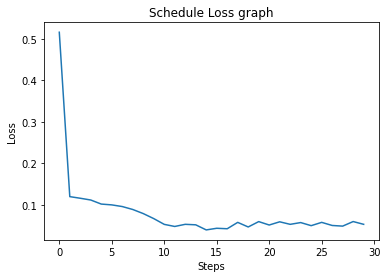

In [ ]:

loss = loss.replace('[[', '|')
loss = loss.replace(']]', '|')
loss_list = loss.split('|')

losses = []
for el in loss_list:
  try:
    x = float(el)
    losses.append(x)
  except ValueError:
     continue

loss_df = pd.DataFrame(losses, columns=['Loss'])
g = sns.lineplot(data=loss_df, x=loss_df.index, y='Loss')
g.set(title='Schedule Loss graph')
g.set(xlabel='Steps')



# TESTING

In [ ]:
from evaluate_solvers import main 

In [ ]:
main('facilities', unassigned_factor=3)

evaluating directory test_100_100_5 instance 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
evaluating directory test_100_100_5 instance 2
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
evaluating directory test_100_100_5 instance 3
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
Set 

In [ ]:
main('schedules', unassigned_factor=1.5)

evaluating directory transfer_8_20_5 instance 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
evaluating directory transfer_8_20_5 instance 2
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
evaluating directory transfer_8_20_5 instance 3
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
S

In [ ]:
main('cauctions', unassigned_factor=1)

evaluating directory train_100_500 instance 1
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
evaluating directory train_100_500 instance 2
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
evaluating directory train_100_500 instance 3
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
Set par

# RESULTS

## Facilities 

In [ ]:
%cd /gdrive/MyDrive/498/neural_lns/data/evaluations

/gdrive/MyDrive/498/neural_lns/data/evaluations


In [ ]:
df = pd.read_csv('facilities.csv')

In [ ]:
df = df[df['submip optimal'] == True]
df.shape

(45, 10)

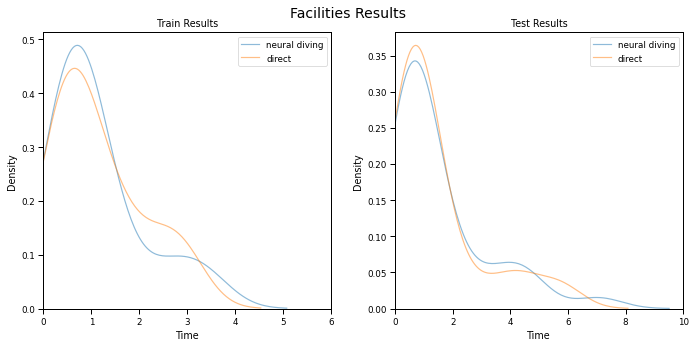

In [ ]:
df = df.copy()
df['type'] = df.apply(lambda x: "train" if "train" in x['instance set'] else "test", axis=1)
train = df[df['type'] =='train']
test = df[df['type'] =='test']

sns.set_context('paper')
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.kdeplot(train['neural diving time'], alpha=0.5, label='neural diving', ax=ax[0])
sns.kdeplot(train['direct time'], alpha=0.5, label='direct', ax=ax[0])
ax[0].legend()
ax[0].set(xlim=(0,6))
ax[0].set(xlabel='Time')
ax[0].set(title="Train Results")

sns.kdeplot(test['neural diving time'], alpha=0.5, label='neural diving', ax=ax[1])
sns.kdeplot(test['direct time'], alpha=0.5, label='direct', ax=ax[1])
ax[1].legend()
ax[1].set(xlim=(0,10))
ax[1].set(title="Test Results")
ax[1].set(xlabel='Time')
plt.suptitle("Facilities Results", fontsize=14)
plt.tight_layout(pad=2)


In [ ]:
train['neural diving time'].mean(), train['neural diving time'].std()

(1.1207393606503804, 0.9441204232700171)

In [ ]:
train['direct time'].mean(), train['direct time'].std()

(1.1508672436078389, 0.909867113541635)

In [ ]:
test['neural diving time'].mean(), test['neural diving time'].std()

(1.4962079813986113, 1.6437779216708415)

In [ ]:
test['direct time'].mean(), test['direct time'].std()

(1.4490918968663071, 1.571180423957659)

## Schedules

In [ ]:
df = pd.read_csv('schedules.csv')

In [ ]:
df = df[df['submip optimal'] == True]
df.shape

(55, 10)

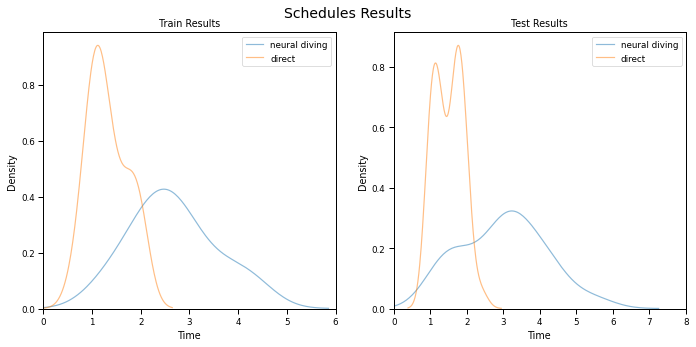

In [ ]:
df = df.copy()
df['type'] = df.apply(lambda x: "train" if "train" in x['instance set'] else "test", axis=1)
train = df[df['type'] =='train']
test = df[df['type'] =='test']

sns.set_context('paper')
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.kdeplot(train['neural diving time'], alpha=0.5, label='neural diving', ax=ax[0])
sns.kdeplot(train['direct time'], alpha=0.5, label='direct', ax=ax[0])
ax[0].legend()
ax[0].set(xlim=(0,6))
ax[0].set(xlabel='Time')
ax[0].set(title="Train Results")

sns.kdeplot(test['neural diving time'], alpha=0.5, label='neural diving', ax=ax[1])
sns.kdeplot(test['direct time'], alpha=0.5, label='direct', ax=ax[1])
ax[1].legend()
ax[1].set(xlim=(0,8))
ax[1].set(title="Test Results")
ax[1].set(xlabel='Time')
plt.suptitle("Schedules Results", fontsize=14)
plt.tight_layout(pad=2)


In [ ]:
train['neural diving time'].mean(), train['neural diving time'].std()

(2.6671298344930015, 0.8708500868289164)

In [ ]:
train['direct time'].mean(), train['direct time'].std()

(1.3231124718983969, 0.39817167276096055)

In [ ]:
test['neural diving time'].mean(), test['neural diving time'].std()

(2.9923091769218444, 1.1403505811423151)

In [ ]:
test['direct time'].mean(), test['direct time'].std()

(1.497693806886673, 0.3826395246559197)

## cauctions

In [ ]:
df = pd.read_csv('cauctions.csv')

In [ ]:
df = df[df['submip optimal'] == True]
df.shape

(55, 10)

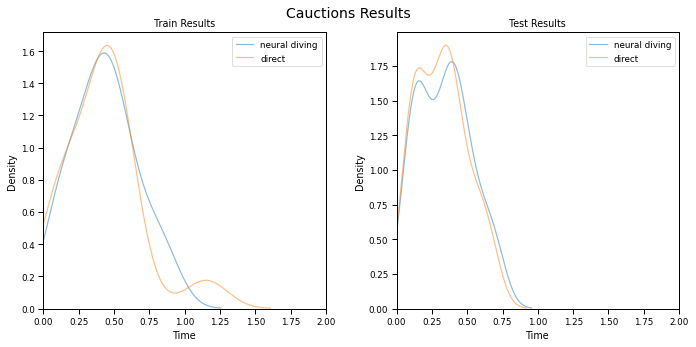

In [ ]:
df = df.copy()
df['type'] = df.apply(lambda x: "train" if "train" in x['instance set'] else "test", axis=1)
train = df[df['type'] =='train']
test = df[df['type'] =='test']

sns.set_context('paper')
fig, ax = plt.subplots(1,2, figsize=(10,5))

sns.kdeplot(train['neural diving time'], alpha=0.5, label='neural diving', ax=ax[0])
sns.kdeplot(train['direct time'], alpha=0.5, label='direct', ax=ax[0])
ax[0].legend()
ax[0].set(xlim=(0,2))
ax[0].set(xlabel='Time')
ax[0].set(title="Train Results")

sns.kdeplot(test['neural diving time'], alpha=0.5, label='neural diving', ax=ax[1])
sns.kdeplot(test['direct time'], alpha=0.5, label='direct', ax=ax[1])
ax[1].legend()
ax[1].set(xlim=(0,2))
ax[1].set(xlabel='Time')
ax[1].set(title="Test Results")
plt.suptitle("Cauctions Results", fontsize=14)
plt.tight_layout(pad=2)


In [ ]:
train['neural diving time'].mean(), train['neural diving time'].std()

(0.4335116704305013, 0.22436912362920775)

In [ ]:
train['direct time'].mean(), train['direct time'].std()

(0.42305994033813477, 0.26117865511363886)

In [ ]:
test['neural diving time'].mean(), test['neural diving time'].std()

(0.34065583944320676, 0.1855797937977237)

In [ ]:
test['direct time'].mean(), test['direct time'].std()

(0.3215854823589325, 0.17594300957433534)

# DEMO


In [ ]:
import os
import pandas as pd
import re

from sampling import RepeatedCompetitionSampler
from solvers import NeuralDivingSolver, DirectSolver

instance_pth = "/gdrive/MyDrive/498/neural_lns/data/instances/" + 'facilities/test_100_100_5/' + 'instance_20'
unassigned_factor = 3

n_cust, n_facilities, ratio = 100, 100, 5
# give ourselves <unassigned_factor> as many warehouses as cover capacity (2 is good)
num_unassigned_vars = int(unassigned_factor * ratio * n_cust / n_facilities)


# solvers for each instance
ds = DirectSolver()
ds.load_model(instance_pth, silence=True)
direct_data = ds.solve()

model_dir = os.path.join('/gdrive/MyDrive/498/neural_lns/', 'models_facilities')
sampler = RepeatedCompetitionSampler(model_dir)
nds = NeuralDivingSolver(sampler=sampler)
nds.load_model(instance_pth, silence=True)
neural_diving_data = nds.solve(num_unassigned_vars=num_unassigned_vars)


Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 669674
Academic license - for non-commercial use only - registered to nem323@lehigh.edu


In [ ]:
print(direct_data['direct time'])
print(neural_diving_data['neural diving time'])

3.839184045791626
3.8307931423187256
